**Задание** \
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.\
Описание задания:\
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn import datasets
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
from sklearn.datasets import fetch_california_housing
type(fetch_california_housing)

function

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
housing_df = pd.DataFrame(data=housing.data, 
                  columns=housing.feature_names)
housing_df['target'] = housing.target

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.**

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков нет

**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

**4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.**

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = housing_df['target']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def get_scores(X, y):
    ''' Функция обучает модель линейной регрессии
    и вычисляет метрики RMSE, R2 на обучающем и тестовом множестве'''

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)

    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)

    return print(f'На обучающем множестве RMSE = {round(rmse_train, 3)}, R2 = {round(r2_train, 3)} \
                 На тестовом множестве RMSE = {round(rmse_test, 3)}, R2 = {round(r2_test, 3)}')


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.72, R2 = 0.613                  На тестовом множестве RMSE = 0.746, R2 = 0.576


**5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?**

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['font.size'] = 14

Text(0.5, 1.0, 'Распределение целевой переменной')

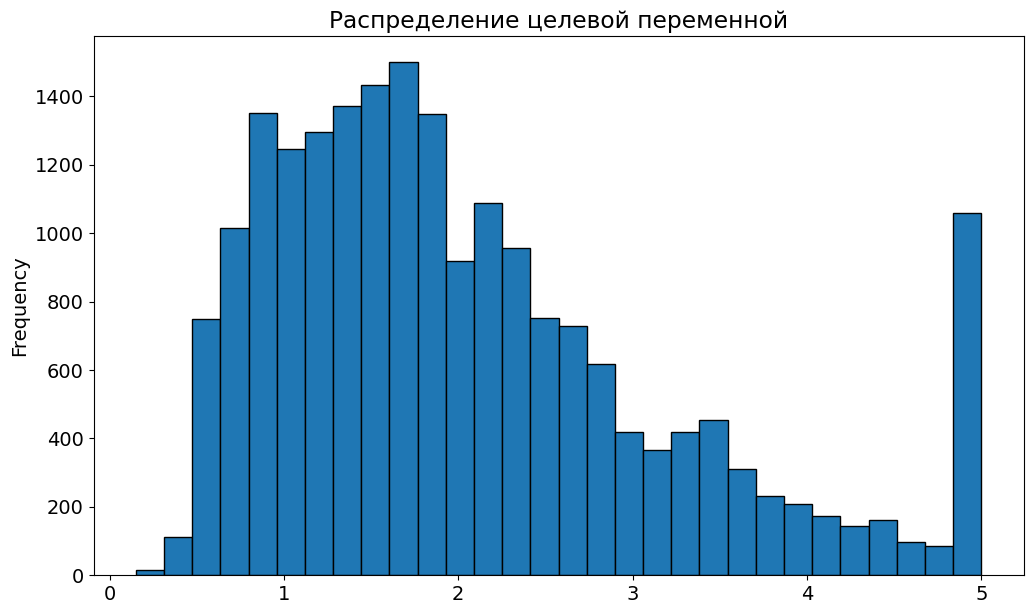

In [ ]:
y.plot(kind= 'hist', edgecolor ='black', bins = 30)

plt.title('Распределение целевой переменной')

Распределение ненормальное, довольно существенная часть очень дорогих домов. Выбросов нет.

**6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции. \
a. Сделайте выводы. \
b. Удалите признаки на основании полученных значений, выводов. \
c. Повторите п. 3, п. 4 на измененных данных.**

[Text(0.5, 1.0, 'Корреляционная матрица')]

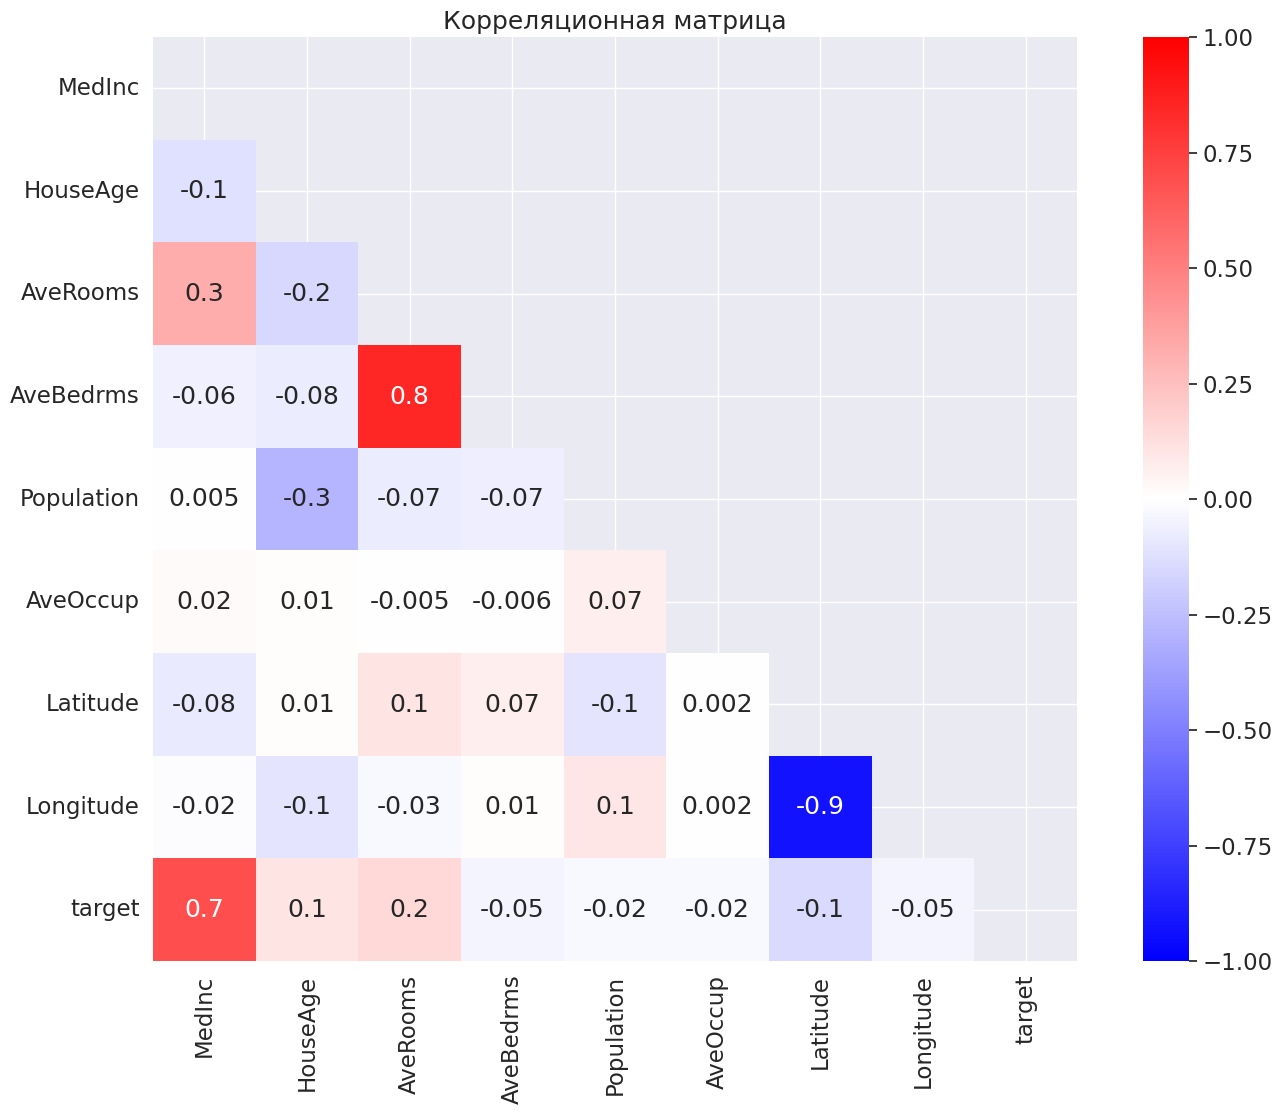

In [ ]:
sns.set(rc={'figure.figsize':(17, 12)}, font_scale = 1.5)

matrix = np.triu(housing_df.corr())

corr = housing_df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True, fmt ='.1g',
            vmin = -1, vmax = 1, center = 0,
            mask = matrix,
            cmap= 'bwr', square=True).set(title = 'Корреляционная матрица')


Признаки 'AveBedrms' и 'AveRooms' коллинеарны, поэтому удалим признак 'AveBedrms'.

In [ ]:
housing_df.drop(columns= ['AveBedrms'], inplace = True)

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Population,Latitude,Longitude
0,8.3252,41.0,6.984127,322.0,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,37.86,-122.22
2,7.2574,52.0,8.288136,496.0,37.85,-122.24
3,5.6431,52.0,5.817352,558.0,37.85,-122.25
4,3.8462,52.0,6.281853,565.0,37.85,-122.25


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.733, R2 = 0.598                  На тестовом множестве RMSE = 0.741, R2 = 0.581


Чуть улучшились метрики RMSE на тестовом множестве и R2 на тренировочном

**7. Исследуйте оставленные признаки на выбросы.\
a. Удалите выбросы в случае обнаружения.\
b. Повторите п. 3, п. 4 на измененных данных.**

In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,Population,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,41.950000,-114.310000,5.000010


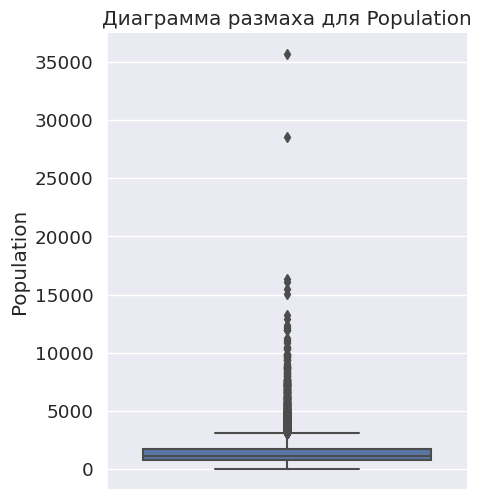

In [ ]:
sns.set(rc={'figure.figsize':(12, 15)}, font_scale = 1.2)
sns.catplot(y ='Population',
                kind='box',
                data = housing_df).set(title = 'Диаграмма размаха для Population')

С населением не понятно. Посмотрим на строки с максимальным и минимальным значением по признаку 'Population'

In [ ]:
housing_df[(housing_df['Population'] > 20000) | (housing_df['Population'] < 5)]

,MedInc,HouseAge,AveRooms,Population,Latitude,Longitude,target
5342,0.5360,16.0,4.500000,3.0,34.04,-118.44,3.500
9880,2.3087,11.0,5.364518,28566.0,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,35682.0,33.35,-117.42,1.344


Посмотрим на дома с такими же координатами

In [ ]:
housing_df[(housing_df['Latitude'] == 34.04) & (housing_df['Longitude'] == -118.44) |
           ((housing_df['Latitude'] == 36.64) & (housing_df['Longitude'] == -121.79)) |
           ((housing_df['Latitude'] == 33.35) & (housing_df['Longitude'] == -117.42))]

,MedInc,HouseAge,AveRooms,Population,Latitude,Longitude,target
5341,2.1875,49.0,4.571429,14.0,34.04,-118.44,2.250
5342,0.5360,16.0,4.500000,3.0,34.04,-118.44,3.500
5343,3.0714,31.0,4.231379,1535.0,34.04,-118.44,3.478
9880,2.3087,11.0,5.364518,28566.0,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,35682.0,33.35,-117.42,1.344


Признак 'Population' остаётся весьма загадочным, потому что не до конца понятно, что имеется в виду. Если это количество человек, проживающих в районе, то почему данные разные у одинаковых координат? Если в доме, то не может быть такого большого значения. Попробуем избавиться от объектов с этими экстремальыми показателями. Ограничим данные по этому признаку квантилями 05 и 95

In [ ]:
upper_lim = housing_df['Population'].quantile(.95) 
lower_lim = housing_df['Population'].quantile(.05) 
housing_df.loc[(housing_df['Population'] > upper_lim),'Population'] = upper_lim 
housing_df.loc[(housing_df['Population'] < lower_lim),'Population'] = lower_lim

In [ ]:
housing_df['Population'].describe()

count    20640.000000
mean      1352.935465
std        775.085867
min        348.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max       3288.000000
Name: Population, dtype: float64

Возможно, стоит избавиться от этого признака целиком, если опираться еще и на визуализацию с корреляционной матрицей.

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
y = housing_df['target']

In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.733, R2 = 0.598                  На тестовом множестве RMSE = 0.741, R2 = 0.581


Ничего не поменялось, удалим весь столбец

In [ ]:
X = X.loc[ : , X.columns != 'Population']
X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,8.288136,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.733, R2 = 0.598                  На тестовом множестве RMSE = 0.741, R2 = 0.581


Ничего не поменялось. Удалим признак Population

In [ ]:
housing_df.drop(columns='Population', inplace = True)

Теперь посмотрим на объекты с экстремальными значениями в признаке 'AveRooms'.

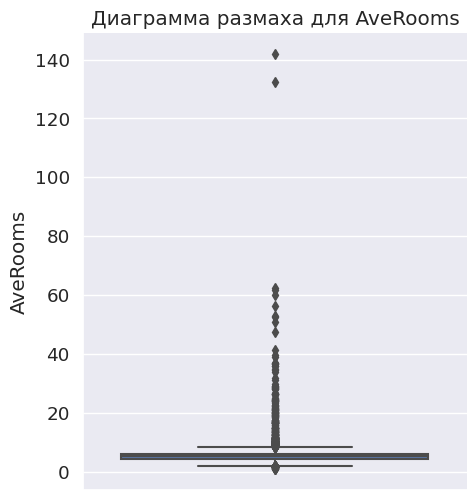

In [ ]:
sns.set(rc={'figure.figsize':(12, 15)}, font_scale = 1.2)
sns.catplot(y = 'AveRooms',
                kind='box',
                data = housing_df).set(title = 'Диаграмма размаха для AveRooms')

In [ ]:
housing_df[(housing_df['AveRooms'] > 30) | (housing_df['AveRooms'] < 1)]

,MedInc,HouseAge,AveRooms,Latitude,Longitude,target
1102,2.4028,17.0,31.777778,40.06,-121.54,0.67500
1239,3.0750,13.0,33.989691,38.31,-120.27,1.08300
1240,3.1250,11.0,47.515152,38.42,-120.19,0.77500
1872,2.4917,27.0,38.840909,38.94,-119.93,2.00000
1912,4.9750,16.0,56.269231,39.01,-120.16,2.06300
1913,4.0714,19.0,61.812500,39.01,-120.06,4.37500
1914,1.8750,33.0,141.909091,38.91,-120.10,5.00001
1926,0.9227,11.0,37.000000,38.90,-120.30,0.95500
1978,3.5667,13.0,34.843750,38.71,-120.32,1.15600
1979,4.6250,34.0,132.533333,38.80,-120.08,1.62500


Странно, что практически у всех домов с огромным количеством комнат довольно низкая стоимость. При этом возраст дома сильно варьируется

In [ ]:
housing_df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

Ограничим данные по этому признаку квантилем 95 по верхней границе и 1 комнатой по нижней

In [ ]:
upper_lim = housing_df['AveRooms'].quantile(.95) 
housing_df.loc[(housing_df['AveRooms'] > upper_lim),'AveRooms'] = upper_lim 

In [ ]:
housing_df = housing_df[housing_df['AveRooms'] >= 1]

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,7.640247,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25


In [ ]:
y = housing_df['target']

In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.732, R2 = 0.597                  На тестовом множестве RMSE = 0.741, R2 = 0.587


Лучше стали RMSE на тренировочном множестве и R2 на тестовом

**8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.\
a. Повторите п. 3, п. 4 на измененных данных.**

Посмотрим на распределения данных по оставшимся колонкам, кроме координат, потому что их влияние на целевую переменную нелинейно.

In [ ]:
columns_drop = ['Longitude', 'Latitude']
subset = housing_df.drop(columns=columns_drop)

subset['target'] = pd.qcut(subset['target'], 5, retbins=False)
subset['target'] = subset['target'].apply(lambda x: x.mid)

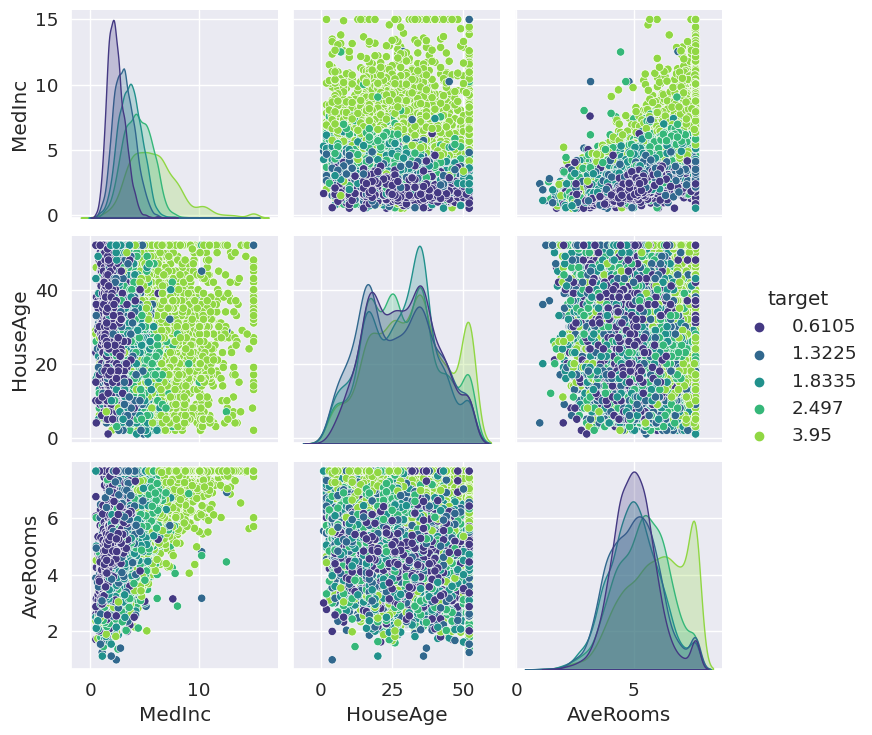

In [ ]:
_ = sns.pairplot(data=subset, hue='target', palette="viridis")

Попробуем логарифмировать признак HouseAge

In [ ]:
housing_df['HouseAge_Log'] = (housing_df['HouseAge']+1).transform(np.log)
housing_df.head()

<ipython-input-40-f3b9e3a72a67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['HouseAge_Log'] = (housing_df['HouseAge']+1).transform(np.log)


,MedInc,HouseAge,AveRooms,Latitude,Longitude,target,HouseAge_Log
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,3.737670
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,3.091042
2,7.2574,52.0,7.640247,37.85,-122.24,3.521,3.970292
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,3.970292
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,3.970292


Посмотрим, как поменялись метрики

In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,HouseAge_Log
0,8.3252,41.0,6.984127,37.88,-122.23,3.737670
1,8.3014,21.0,6.238137,37.86,-122.22,3.091042
2,7.2574,52.0,7.640247,37.85,-122.24,3.970292
3,5.6431,52.0,5.817352,37.85,-122.25,3.970292
4,3.8462,52.0,6.281853,37.85,-122.25,3.970292


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.732, R2 = 0.598                  На тестовом множестве RMSE = 0.74, R2 = 0.588


Стало чуть лучше на тестовом множестве и R2 на тренировочном. Логарифмируем MedInc

In [ ]:
housing_df['MedInc_Log'] = (housing_df['MedInc']+1).transform(np.log)
housing_df.head()

<ipython-input-43-07e65a9b4ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['MedInc_Log'] = (housing_df['MedInc']+1).transform(np.log)


,MedInc,HouseAge,AveRooms,Latitude,Longitude,target,HouseAge_Log,MedInc_Log
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,3.737670,2.232720
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,3.091042,2.230165
2,7.2574,52.0,7.640247,37.85,-122.24,3.521,3.970292,2.111110
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,3.970292,1.893579
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,3.970292,1.578195


In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,HouseAge_Log,MedInc_Log
0,8.3252,41.0,6.984127,37.88,-122.23,3.737670,2.232720
1,8.3014,21.0,6.238137,37.86,-122.22,3.091042,2.230165
2,7.2574,52.0,7.640247,37.85,-122.24,3.970292,2.111110
3,5.6431,52.0,5.817352,37.85,-122.25,3.970292,1.893579
4,3.8462,52.0,6.281853,37.85,-122.25,3.970292,1.578195


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.732, R2 = 0.598                  На тестовом множестве RMSE = 0.741, R2 = 0.588


Чуть увеличилась (ухудшилась) метрика RMSE на тестовом множестве

Ну и за компанию проделаем тоже самое с признаком AveRooms

In [ ]:
housing_df['AveRooms_Log'] = (housing_df['AveRooms']+1).transform(np.log)
housing_df.head()

<ipython-input-46-8c57c7c04d09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['AveRooms_Log'] = (housing_df['AveRooms']+1).transform(np.log)


,MedInc,HouseAge,AveRooms,Latitude,Longitude,target,HouseAge_Log,MedInc_Log,AveRooms_Log
0,8.3252,41.0,6.984127,37.88,-122.23,4.526,3.737670,2.232720,2.077455
1,8.3014,21.0,6.238137,37.86,-122.22,3.585,3.091042,2.230165,1.979364
2,7.2574,52.0,7.640247,37.85,-122.24,3.521,3.970292,2.111110,2.156431
3,5.6431,52.0,5.817352,37.85,-122.25,3.413,3.970292,1.893579,1.919471
4,3.8462,52.0,6.281853,37.85,-122.25,3.422,3.970292,1.578195,1.985385


In [ ]:
X = housing_df.loc[ : , housing_df.columns != 'target']
X.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude,HouseAge_Log,MedInc_Log,AveRooms_Log
0,8.3252,41.0,6.984127,37.88,-122.23,3.737670,2.232720,2.077455
1,8.3014,21.0,6.238137,37.86,-122.22,3.091042,2.230165,1.979364
2,7.2574,52.0,7.640247,37.85,-122.24,3.970292,2.111110,2.156431
3,5.6431,52.0,5.817352,37.85,-122.25,3.970292,1.893579,1.919471
4,3.8462,52.0,6.281853,37.85,-122.25,3.970292,1.578195,1.985385


In [ ]:
get_scores(X, y)

На обучающем множестве RMSE = 0.721, R2 = 0.609                  На тестовом множестве RMSE = 0.729, R2 = 0.601


Все метрики улучшились.

Посмотрим, как связаны с целевой переменной координаты. 

Видно, что есть зависимость от расположения. И в центре больших населённых пунктов возле побережья стоимость выше.

Возможно стоит попробовать другую модель. Например, полиноминальной регрессии.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train)
poly.fit(X_poly_test, y_test)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)


LinearRegression()

In [ ]:
y_pred_train = model_poly.predict(X_poly)
y_pred = model_poly.predict(X_poly_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print(f'На обучающем множестве RMSE = {round(rmse_train, 3)}, R2 = {round(r2_train, 3)} \
       На тестовом множестве RMSE = {round(rmse_test, 3)}, R2 = {round(r2_test, 3)}')

На обучающем множестве RMSE = 0.667, R2 = 0.666        На тестовом множестве RMSE = 0.683, R2 = 0.649


Все метрики заметно улучшились

**9. Сформулируйте выводы по проделанной работе.\
a. Кратко опишите какие преобразования были сделаны с данными.\
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.\
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.**

In [ ]:
data = {'model': ['Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Polynomial Regression'], 
        'RMSE_train': [0.72, 0.733, 0.732, 0.721, 0.667], 'RMSE_test': [0.746, 0.741, 0.741, 0.729, 0.683],
        'R2_train': [0.613, 0.598, 0.597, 0.609, 0.666], 'R2_test': [0.576, 0.581, 0.587, 0.601, 0.649],
        'features' : ['all', 'MedInc, Population,	HouseAge, AveRooms, Latitude, Longitude', 
                      'MedInc, HouseAge, AveRooms, Latitude, Longitude', 
                      'MedInc, HouseAge, AveRooms, Latitude, Longitude, HouseAge_Log, MedInc_Log, AveRooms_Log',
                      'MedInc, HouseAge, AveRooms, Latitude, Longitude, HouseAge_Log, MedInc_Log, AveRooms_Log'], 
        'transformations': ['No transformation', 'AveBedrms and AveOccup deleted', 
                            'Outliers deleted', 'Added logarithmic features: HouseAge_Log, MedInc_Log, AveRooms_Log',
                            'Another method: Polynominal Regression']} 
 
df_compare_metrics = pd.DataFrame(data)

df_compare_metrics

,model,RMSE_train,RMSE_test,R2_train,R2_test,features,transformations
0,Linear Regression,0.720,0.746,0.613,0.576,all,No transformation
1,Linear Regression,0.733,0.741,0.598,0.581,"MedInc, Population,\tHouseAge, AveRooms, Latit...",AveBedrms and AveOccup deleted
2,Linear Regression,0.732,0.741,0.597,0.587,"MedInc, HouseAge, AveRooms, Latitude, Longitude",Outliers deleted
3,Linear Regression,0.721,0.729,0.609,0.601,"MedInc, HouseAge, AveRooms, Latitude, Longitud...","Added logarithmic features: HouseAge_Log, MedI..."
4,Polynomial Regression,0.667,0.683,0.666,0.649,"MedInc, HouseAge, AveRooms, Latitude, Longitud...",Another method: Polynominal Regression


a. Были удалены ненужные на мой взгляд признаки, удалены выбросы, сделаны математические преобразования и взята модель полиноминальной регрессии.

с. Метрики на тестовой выборке практически всё время улучшались. Поэтому я считаю, что справилась с поставленой задачей.